# Processing TESS sector 1 data for TOI4504

In [1]:
from process_TESS_data.process_flux_data import *
%matplotlib inline
path = '../research/star_systems/TOI-4504/lightkurve/'


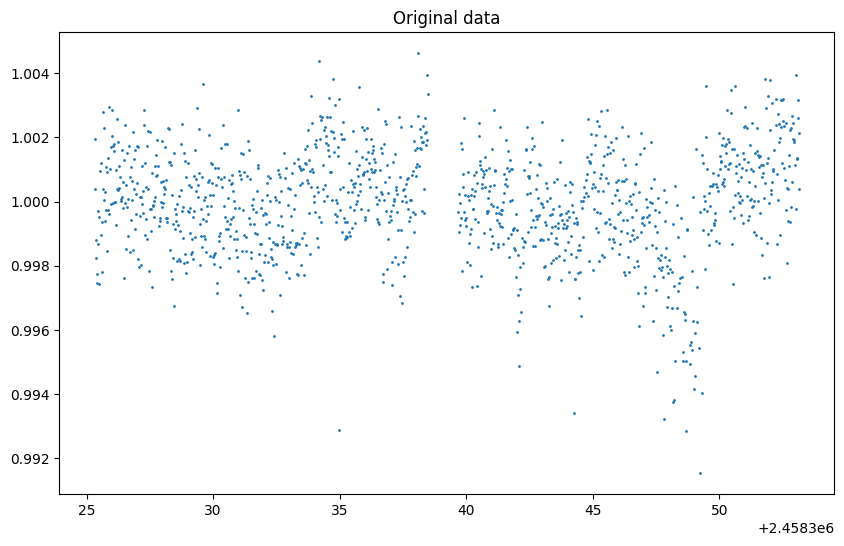

,time,flux,flux_err
0,2.458325e+06,1.001950,0.001267
1,2.458325e+06,1.000378,0.001267
2,2.458325e+06,0.998227,0.001267
3,2.458325e+06,0.998789,0.001267
4,2.458325e+06,0.997462,0.001267
...,...,...,...
1243,2.458353e+06,1.001339,0.001267
1244,2.458353e+06,1.003176,0.001267
1245,2.458353e+06,1.002607,0.001267
1246,2.458353e+06,1.000385,0.001267


In [2]:
full_path = path+"1/1_QLP_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

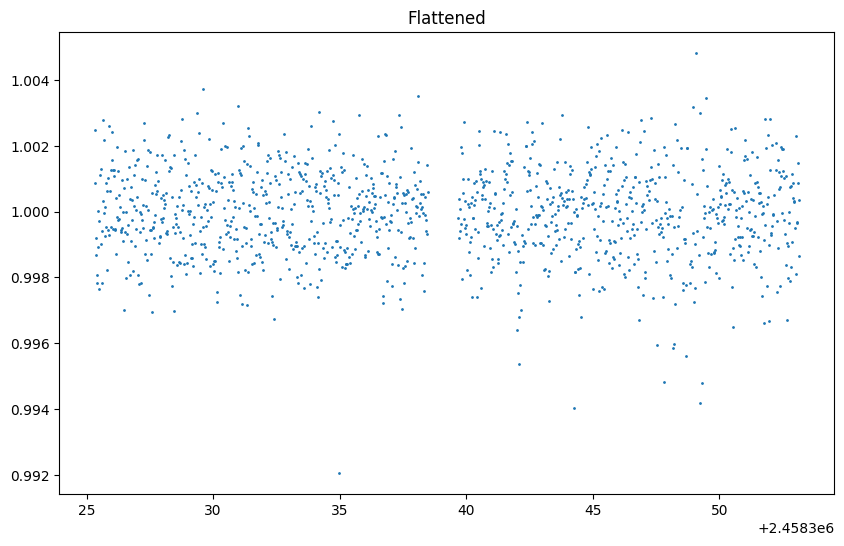

In [3]:
lc = df2lc(df)
lc = lc.flatten(
    window_length=101,  # Must be odd integer. Controls smoothness (longer → stronger smoothing).
    polyorder=2,        # Polynomial order (must be < window_length)
    break_tolerance=5,  # Split data at large time gaps.
    niters=3,           # Iterative sigma-clipping rounds. Remove outliers during flattening.
    sigma=3             # Outlier clipping threshold. Remove outliers during flattening.
)
# Use return_trend=True to retrieve the removed trend component.
df = lc2df(lc)
plot_this(df.time, [df.flux], ["flux"], title="Flattened")
# df2

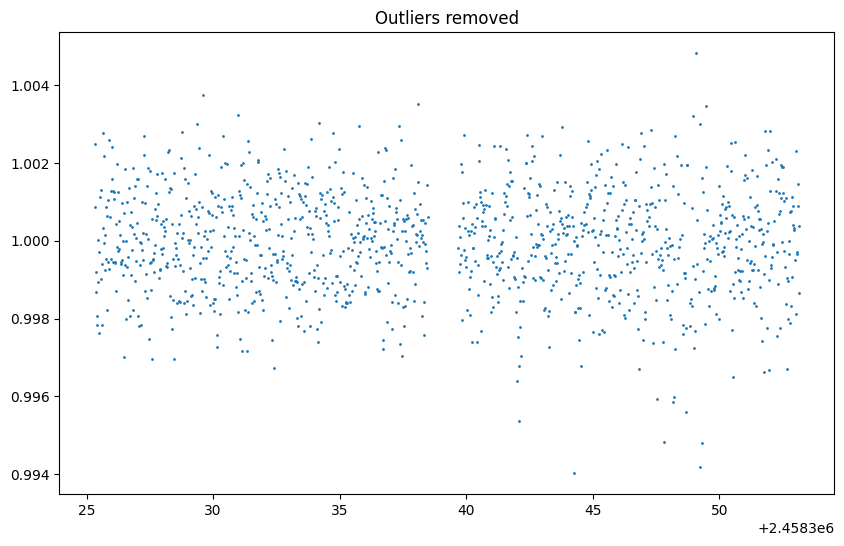

In [4]:
lc = df2lc(df)
lc = lc.remove_outliers(sigma_lower=5.5, sigma_upper=4)
df = lc2df(lc)
plot_this(df.time, [df.flux], ["flux"], title=f"Outliers removed")

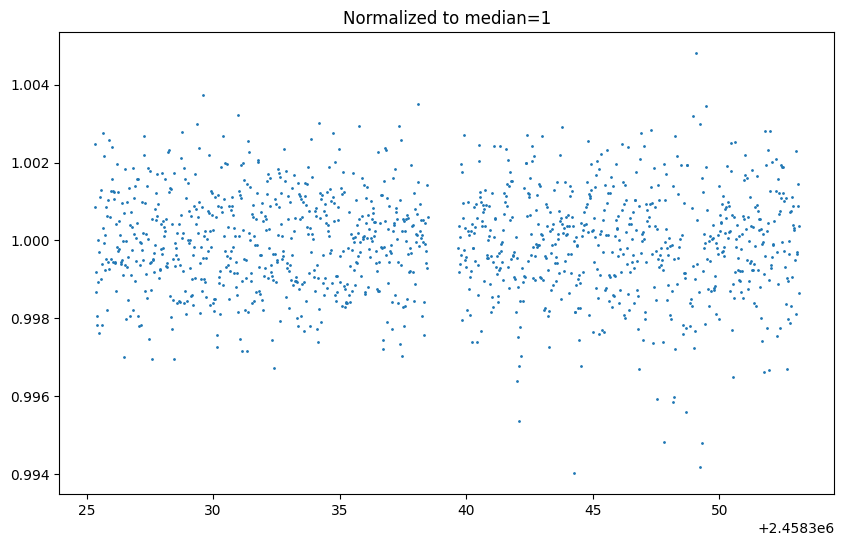

In [5]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")

In [6]:
df2csv(df, full_path[:-4]+"_p.csv")